In [2]:
from ase.build import mx2
from ase.io import read
from abtem import *
import numpy as np
import abtem
import os
from utils.utils import *
from tqdm import tqdm
device = 'gpu'

In [2]:
# 读取cif文件结构
atoms = read("./cells/MoTe2-2H-20.cif")

In [6]:
atoms = abtem.orthogonalize_cell(atoms)

In [12]:
atoms.edit()

In [ ]:
atoms.cell = (25.6, 25.6, 6.1)

In [ ]:
# atoms.center(vacuum=2.2, axis=0)
# atoms.center(vacuum=2.1, axis=1)
atoms.center(vacuum=1, axis=2)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

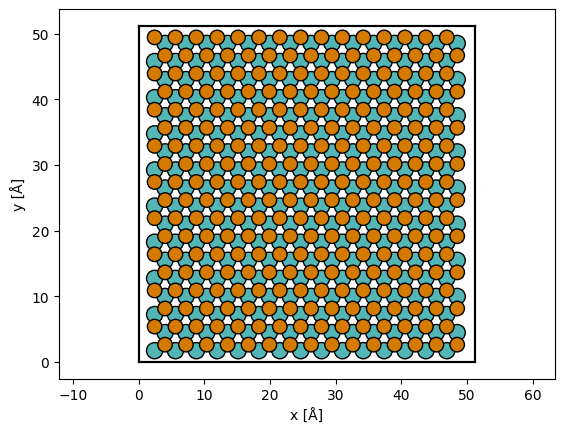

In [3]:
show_atoms(atoms, scale=0.8, plane='xy')

In [ ]:
# 拼接相MoTe2处理
num_pos = 100
psize = 10
formula = 'MoTe2'
atoms_mo_2H = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
atoms_te_2H = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
atoms_te_down = atoms_te_2H[[atom.index for atom in atoms_te_2H if atom.get('position')[2]<3]]
atoms_te_up = atoms_te_2H[[atom.index for atom in atoms_te_2H if atom.get('position')[2]>3]]
atoms_mo_1T = atoms[[atom.index for atom in atoms if atom.symbol=='C']]
atoms_te_1T =  atoms[[atom.index for atom in atoms if atom.symbol=='H']]

max_num_mo_2H = int(0.1 * len(atoms_mo_2H))
max_num_te_2H = int(0.1 * len(atoms_te_2H))
max_num_mo_1T = int(0.1 * len(atoms_mo_1T))
max_num_te_1T = int(0.1 * len(atoms_te_1T))
max_radius = int(0.35 * atoms.cell[0][0])
min_radius = int(0.07 * atoms.cell[0][0])

# 生成25个随机defect atoms对象 添加到atoms_list
for i in range(25):
    num_defect_mo_2H = random.randint(1, max_num_mo_2H)
    num_defect_te_2H = random.randint(1, max_num_te_2H)
    num_defect_mo_1T = random.randint(1, max_num_mo_1T)
    num_defect_te_1T = random.randint(1, max_num_te_1T)
    atoms_mo_2H_copy = atoms_mo_2H.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_mo_1T_copy = atoms_mo_1T.copy()
    atoms_te_1T_copy = atoms_te_1T.copy()
    
    random_defect(atoms_mo_2H_copy, num_defect_mo_2H)
    random_defect(atoms_te_down_copy, int(num_defect_te_2H/2))
    random_defect(atoms_te_up_copy, int(num_defect_te_2H/2))
    random_defect(atoms_mo_1T_copy, num_defect_mo_1T)
    random_defect(atoms_te_1T_copy, num_defect_te_1T)
    
    atoms_mo_2H_copy.extend(atoms_te_down_copy)
    atoms_mo_2H_copy.extend(atoms_te_up_copy)
    # for atom in atoms_mo_1T_copy:
    #     atom.symbol = 'Mo'
    # for atom in atoms_te_1T_copy:
    #     atom.symbol = 'Te'
    atoms_mo_2H_copy.extend(atoms_mo_1T_copy)
    atoms_mo_2H_copy.extend(atoms_te_1T_copy)
    atoms_list.append(atoms_mo_2H_copy)
    
# 生成25个随机空洞atoms对象 添加到atoms_list
for i in range(25):
    num_defect_mo_2H = random.randint(1, max_num_mo_2H)
    num_defect_te_2H = random.randint(1, max_num_te_2H)
    num_defect_mo_1T = random.randint(1, max_num_mo_1T)
    num_defect_te_1T = random.randint(1, max_num_te_1T)
    atoms_mo_2H_copy = atoms_mo_2H.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_mo_1T_copy = atoms_mo_1T.copy()
    atoms_te_1T_copy = atoms_te_1T.copy()
    
    random_defect(atoms_mo_2H_copy, num_defect_mo_2H)
    random_defect(atoms_te_down_copy, int(num_defect_te_2H/2))
    random_defect(atoms_te_up_copy, int(num_defect_te_2H/2))
    random_defect(atoms_mo_1T_copy, num_defect_mo_1T)
    random_defect(atoms_te_1T_copy, num_defect_te_1T)
    
    atoms_mo_2H_copy.extend(atoms_te_down_copy)
    atoms_mo_2H_copy.extend(atoms_te_up_copy)
    # for atom in atoms_mo_1T_copy:
    #     atom.symbol = 'Mo'
    # for atom in atoms_te_1T_copy:
    #     atom.symbol = 'Te'
    atoms_mo_2H_copy.extend(atoms_mo_1T_copy)
    atoms_mo_2H_copy.extend(atoms_te_1T_copy)

    radius = random.randint(min_radius, max_radius)
    hole(atoms_mo_2H_copy, radius, size=atoms.cell[0][0])
    atoms_list.append(atoms_mo_2H_copy)

In [ ]:
# 1T'相MoTe2处理
num_pos = 200
psize = 20
formula = "MoTe2-1T"
atoms_mo = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
atoms_te_single = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
max_num_mo = int(0.05 * len(atoms_mo))
max_num_te = int(0.05 * len(atoms_te_single))
max_radius = int(0.35 * atoms.cell[0][0])
min_radius = int(0.07 * atoms.cell[0][0])

# 生成25个随机defect atoms对象 添加到atoms_list
for i in range(100):
    num_defect_mo = random.randint(1, max_num_mo)
    num_defect_te = random.randint(1, max_num_te)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_single_copy = atoms_te_single.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect(atoms_te_single_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_single_copy)
    atoms_list.append(atoms_mo_copy)

# 生成25个随机空洞atoms对象 添加到atoms_list
for i in range(100):
    num_defect_mo = random.randint(1, max_num_mo)
    num_defect_te = random.randint(1, max_num_te)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_single_copy = atoms_te_single.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect(atoms_te_single_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_single_copy)

    radius = random.randint(min_radius, max_radius)
    hole(atoms_mo_copy, radius, size=atoms.cell[0][0])
    atoms_list.append(atoms_mo_copy)

# 对atoms对象进行rattle
for i in range(200):
    new_atoms = atoms_list[i].copy()
    new_atoms.rattle(stdev=0.01)
    atoms_list[i] = new_atoms

In [ ]:
# 将atoms对象分离Mo和Te原子导出原子坐标并储存到pos_mo, pos_te列表
pos_mo = []
pos_te = []
for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
    pos_mo.append(xyz_to_xy(atoms_mo_temp.get_positions()))
    pos_te.append(xyz_to_xy(atoms_te_temp.get_positions()))
    
# 生成position对应的density矩阵并储存在label文件夹
std = 2.5 # 高斯函数标准差/宽度
save_file = './labels' + f'/label_{formula}_std={std}_pos={num_pos}'
os.makedirs(save_file)
for i in tqdm(range(len(pos_mo))):
    dens_mo = generate_density_from_position(pos_mo[i], 256, std)
    dens_te = generate_density_from_position(pos_te[i], 256, std)
    label = np.stack((dens_mo, dens_te), axis=0)
    back = generate_background(label)
    np.save(save_file + f'/{i}_mo', dens_mo)
    np.save(save_file + f'/{i}_te', dens_te)
    np.save(save_file + f'/{i}_back', back)

In [ ]:
# 2H相MoTe2处理
# MoTe2结构加载
atoms = orthogonalize_cell(mx2(formula='MoTe2', kind='2H', a=3.18, thickness=3.19, size=(1, 1, 1), vacuum=1))*(7, 4, 1)
atoms.center(vacuum=2.46, axis=0)
atoms.center(vacuum=2.7, axis=1)
atoms.cell = (25.6, 25.6, 3.21)

In [ ]:
# 包含单层的2H相MoTe2处理
formula = 'MoTe2-2H-withmono-25'
num_pos = 200
# 生成原始atoms对象
atoms_mo = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
atoms_te = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
atoms_te_down = atoms_te[[atom.index for atom in atoms_te if atom.get('position')[2]<1.6]]
atoms_te_up = atoms_te[[atom.index for atom in atoms_te if atom.get('position')[2]>1.6]]

# 生成20个随机defect atoms对象 添加到atoms_list
for i in range(100):
    num_defect_mo = random.randint(1, 30)
    num_defect_te = random.randint(1, 30)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect(atoms_te_up_copy, num_defect_te)
    random_defect(atoms_te_down_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_up_copy)
    atoms_mo_copy.extend(atoms_te_down_copy)
    atoms_list.append(atoms_mo_copy)
    
# 生成20个随机空洞atoms对象 添加到atoms_list
for i in range(100):
    num_defect_mo = random.randint(1, 30)
    num_defect_te = random.randint(1, 30)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect(atoms_te_up_copy, num_defect_te)
    random_defect(atoms_te_down_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_up_copy)
    atoms_mo_copy.extend(atoms_te_down_copy)

    radius = random.random()*20 + 5 # 设置随机半径5-15
    hole(atoms_mo_copy, radius, 64)
    atoms_list.append(atoms_mo_copy)

In [ ]:
# 将atoms对象分离Mo和Te原子导出原子坐标并储存到列表
pos_mo = []
pos_te_single = []
pos_te_double = []
scale = 1
for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
    pos_mo.append(xyz_to_xy(atoms_mo_temp.get_positions())/scale)
    pos_single, pos_double = xyz_to_xy_withmono(atoms_te_temp.get_positions())
    pos_te_single.append(pos_single/scale)
    pos_te_double.append(pos_double/scale)
    
# 生成position对应的density矩阵并储存在label文件夹
std = 2.5 # 高斯函数标准差/宽度
save_file = './labels' + f'/label_{formula}_std={std}_pos={num_pos}'
os.makedirs(save_file)
for i in tqdm(range(len(pos_mo))):
    dens_mo = generate_density_from_position(pos_mo[i], 256, std)
    dens_te_single = generate_density_from_position(pos_te_single[i], 256, std)
    dens_te_double = generate_density_from_position(pos_te_double[i], 256, std)
    label = np.stack((dens_mo, dens_te_single, dens_te_double), axis=0)
    back = generate_background(label)
    np.save(save_file + f'/{i}_mo', dens_mo)
    np.save(save_file + f'/{i}_te_single', dens_te_single)
    np.save(save_file + f'/{i}_te_double', dens_te_double)
    np.save(save_file + f'/{i}_back', back)

In [ ]:
# 吸附原子的2H相MoTe2处理
formula = 'MoTe2-2H-withmono-adsorb'
psize = 20
num_pos = 200
atoms_list = []

# 生成原始atoms对象
atoms_mo = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
atoms_te = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
atoms_te_down = atoms_te[[atom.index for atom in atoms_te if atom.get('position')[2]<2]]
atoms_te_up = atoms_te[[atom.index for atom in atoms_te if atom.get('position')[2]>2]]
up_bound = np.max(atoms_te.arrays['positions'][:, 2])
down_bound = np.min(atoms_te.arrays['positions'][:, 2])

max_num = int(0.10 * len(atoms_te))
max_radius = int(0.20 * atoms.cell[0][0])
min_radius = int(0.05 * atoms.cell[0][0])

# 生成随机defect atoms对象 添加到atoms_list
for i in range(int(num_pos/2)):
    num_defect_mo = random.randint(1, int(max_num/3))
    num_defect_te = random.randint(1, max_num)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect(atoms_te_up_copy, num_defect_te)
    random_defect(atoms_te_down_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_up_copy)
    atoms_mo_copy.extend(atoms_te_down_copy)
    atoms_list.append(atoms_mo_copy)
    
# 生成随机空洞atoms对象 添加到atoms_list
for i in range(int(num_pos/2)):
    num_defect_mo = random.randint(1, int(max_num/3))
    num_defect_te = random.randint(1, max_num)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect(atoms_te_up_copy, num_defect_te)
    random_defect(atoms_te_down_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_up_copy)
    atoms_mo_copy.extend(atoms_te_down_copy)
    radius = random.randint(min_radius, max_radius)
    hole(atoms_mo_copy, radius, atoms.cell[0][0])
    atoms_list.append(atoms_mo_copy)

for i in range(num_pos):
    atoms_list[i] = random_process_MoTe2(atoms_list[i])

In [ ]:
# 将atoms对象分离Mo和Te原子导出原子坐标并储存到列表
pos_mo = []
pos_te_single = []
pos_te_double = []
pos_te_adsorb = []
scale = psize/10
def condition_func(value, down_bound, up_bound):
    return (value < down_bound) | (value > up_bound)
for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
    pos_mo.append(xyz_to_xy(atoms_mo_temp.get_positions())/scale)
    pos_single, pos_double, pos_adsorb = xyz_to_xy_withmono_adsorb(atoms_te_temp.get_positions(), lambda x: condition_func(x, down_bound, up_bound))
    pos_te_single.append(pos_single/scale)
    pos_te_double.append(pos_double/scale)
    pos_te_adsorb.append(pos_adsorb/scale)
    
# 生成position对应的density矩阵并储存在label文件夹
std = 2 # 高斯函数标准差/宽度
save_file = './labels' + f'/label_{formula}_psize={psize}_std={std}_pos={num_pos}'
os.makedirs(save_file)
for i in tqdm(range(len(pos_mo))):
    df_mo = pd.DataFrame(pos_mo[i], columns=['col1', 'col2'])
    df_te_adsorb = pd.DataFrame(pos_te_adsorb[i], columns=['col1', 'col2'])
    result = df_mo.merge(df_te_adsorb, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1).values
    
    dens_mo = generate_density_from_position(result, 256, std)
    dens_te_single = generate_density_from_position(pos_te_single[i], 256, std)
    dens_te_double = generate_density_from_position(pos_te_double[i], 256, std)
    dens_te_adsorb = generate_density_from_position(pos_te_adsorb[i], 256, std)
    label = np.stack((dens_mo, dens_te_single, dens_te_double, dens_te_adsorb), axis=0)
    back = generate_background(label)
    np.save(save_file + f'/{i}_mo', dens_mo)
    np.save(save_file + f'/{i}_te_single', dens_te_single)
    np.save(save_file + f'/{i}_te_double', dens_te_double)
    np.save(save_file + f'/{i}_te_adsorb', dens_te_adsorb)
    np.save(save_file + f'/{i}_back', back)

In [9]:
# 2H MoTe2
formula = 'MoTe2-2H-20'
num_pos = 20
psize = 20
scale = psize/10
radius = 3

# 生成原始atoms对象
atoms_mo = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
atoms_te = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
atoms_te_down = atoms_te[[atom.index for atom in atoms_te if atom.get('position')[2]<1.6]]
atoms_te_up = atoms_te[[atom.index for atom in atoms_te if atom.get('position')[2]>1.6]]

max_num = int(0.10 * len(atoms_te))
max_radius = int(0.20 * atoms.cell[0][0])
min_radius = int(0.05 * atoms.cell[0][0])

atoms_list = []
# 生成10个随机defect atoms对象 添加到atoms_list
for i in range(10):
    num_defect_mo = random.randint(1, int(max_num/3))
    num_defect_te = random.randint(1, max_num)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect_te(atoms_te_up_copy, atoms_te_down_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_up_copy)
    atoms_mo_copy.extend(atoms_te_down_copy)
    atoms_list.append(atoms_mo_copy)
    
# 生成10个随机空洞atoms对象 添加到atoms_list
for i in range(10):
    num_defect_mo = random.randint(1, int(max_num/3))
    num_defect_te = random.randint(1, max_num)
    atoms_mo_copy = atoms_mo.copy()
    atoms_te_up_copy = atoms_te_up.copy()
    atoms_te_down_copy = atoms_te_down.copy()
    random_defect(atoms_mo_copy, num_defect_mo)
    random_defect_te(atoms_te_up_copy, atoms_te_down_copy, num_defect_te)
    atoms_mo_copy.extend(atoms_te_up_copy)
    atoms_mo_copy.extend(atoms_te_down_copy)

    radius = random.random()*10 + 5
    hole(atoms_mo_copy, radius, atoms.cell[0][0])
    atoms_list.append(atoms_mo_copy)

In [17]:
scale = 2
atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
pos_mo = xyz_to_xy(atoms_mo_temp.get_positions())/scale
pos_te = xyz_to_xy(atoms_te_temp.get_positions())/scale
np.save('./datasets/mote2/label_2H_full/pos_mo', pos_mo)
np.save('./datasets/mote2/label_2H_full/pos_te', pos_te)

In [23]:
# 将atoms对象分离Mo和Te原子导出原子坐标并储存到列表
pos_mo = []
pos_te = []
for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
    pos_mo.append(xyz_to_xy(atoms_mo_temp.get_positions())/scale)
    pos_te.append(xyz_to_xy(atoms_te_temp.get_positions())/scale)

    
# 生成position对应的density矩阵并储存在label文件夹
radius = 3 # 高斯函数标准差/宽度
save_file = './datasets/mote2' + f'/label_{formula}_psize={psize}_radius={radius}_pos={num_pos}'
os.makedirs(save_file)
for i in tqdm(range(len(pos_mo))):
    dens_mo = generate_circle_from_position(pos_mo[i], 256, radius)
    dens_te = generate_circle_from_position(pos_te[i], 256, radius)
    label = np.stack((dens_mo, dens_te), axis=0)
    back = generate_background(label)
    np.save(save_file + f'/{i}_mo', dens_mo)
    np.save(save_file + f'/{i}_te', dens_te)
    np.save(save_file + f'/{i}_back', back)

100%|██████████| 20/20 [00:03<00:00,  5.96it/s]


In [ ]:
label = np.load('./datasets/mote2/label_MoTe2-2H-20_psize=20_radius=3_pos=20/0_back.npy')
plt.imshow(label)

In [49]:
# Graphene atoms
num_pos = 1
psize = 20
scale = psize/10

radius = 3
pos_atoms = xyz_to_xy(atoms.get_positions())/scale
dens_atoms = generate_circle_from_position(pos_atoms, 256, radius)
np.save('./dataset_atoms/labels/0.npy', dens_atoms)

In [53]:
# Graphene vacancy
num_pos = 20
psize = 20
scale = psize/10

atoms_list = []
for i in range(num_pos):
    atoms_copy = atoms.copy()
    random_defect(atoms_copy, random.randint(1, 5))
    atoms_list.append(atoms_copy)

df_full = pd.DataFrame(xyz_to_xy(atoms.get_positions())/scale, columns=['x', 'y'])
radius = 4
for i in range(num_pos):
    df_reduced = pd.DataFrame(xyz_to_xy(atoms_list[i].get_positions())/scale, columns=['x', 'y'])
    merged_df = pd.merge(df_full, df_reduced, on=['x', 'y'], how='outer', indicator=True)
    deleted_coordinates = merged_df[merged_df['_merge'] == 'left_only']
    deleted_coordinates = deleted_coordinates.drop(columns=['_merge']).values
    dens_vacancy = generate_circle_from_position(deleted_coordinates, 256, radius)
    np.save(f'./dataset_vacancies/labels/{i}.npy', dens_vacancy)

In [8]:
# Graphene dopants
num_pos = 20
psize = 20
scale = psize/10

atoms_list = []
for i in range(num_pos):
    atoms_copy = atoms.copy()
    random_indices = np.random.choice(len(atoms_copy), random.randint(2, 8), replace=False).tolist()
    for atom in atoms_copy:
        if atom.index in random_indices:
            rand = random.random()
            if rand < 0.5: 
                atom.symbol = 'Si'
            else:
                atom.symbol = 'Mg'
    atoms_list.append(atoms_copy)
    
radius = 4
for i in range(num_pos):
    pos = []
    for atom in atoms_list[i]:
        if atom.symbol != 'C':
           pos.append(atom.position)
    dens_dopant = generate_circle_from_position(xyz_to_xy(np.array(pos))/scale, 256, radius)
    np.save(f'./dataset_dopants/labels/{i}.npy', dens_dopant)

In [152]:
def data_init(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

In [ ]:
with Image.open('./dataset_dopants/images/3_0.png') as img:
    image = data_init(img)
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')

In [ ]:
data = np.load('./dataset_dopants/labels/3.npy')
plt.figure(figsize=(10, 10))
plt.imshow(data+image, cmap='gray')

In [11]:
# 将atoms对象保存到json文件
save_file = os.path.join('atoms', f'atoms_{formula}_psize={psize}_pos={num_pos}')
# save_file = ('./dataset_dopants/atoms/')
# atoms_list = []
os.makedirs(save_file)
for i in tqdm(range(num_pos)):
    atoms_list[i].write(filename=os.path.join(save_file, f'{i}.json'), format='json')
    # file_name = os.path.join(save_file, f'{i}.json')
    # atoms_list.append(read(file_name, format='json'))

100%|██████████| 20/20 [00:00<00:00, 57.97it/s]


In [3]:
# 从文件读取atoms对象
from ase.io import read
atoms_list = []
num_pos = 200
psize = 20
formula = "MoTe2-2H-withmono-adsorb"
load_file = os.path.join('atoms', f'atoms_{formula}_psize={psize}_pos={num_pos}')
for i in range(num_pos):
    file_name = os.path.join(load_file, f'{i}.json')
    atoms_list.append(read(file_name, format='json'))

### 根据position 每个position生成随机参数并绘图

In [ ]:
for atoms in atoms_list:
    for atom in atoms:
        if atom.symbol=='H':
            atom.symbol = 'Te'
        if atom.symbol=='C':
            atom.symbol = 'Mo'

In [ ]:
# 画图主循环体(耗时) abtem_version:1.0.3
import dask
abtem.config.set({"device": "gpu", "fft": "fftw", "dask.chunk-size-gpu" : "2048 MB"})
dask.config.set({"num_workers": 1, "distributed.scheduler.worker-saturation" : 1.1})
num_var = 20
num_total = 2 * num_pos * num_var
data_file = os.path.join('datas', f'data_{formula}_psize={psize}_pos={num_pos}_total={num_total}')
os.makedirs(data_file)
for i in range(num_pos):
    atoms_ = atoms_list[i]
    for j in range(num_var):
        energy = 300e3
        Cs = 1e4
        frozen_phonons = FrozenPhonons(atoms_, 10, sigmas=0.1)
        potential = Potential(frozen_phonons, sampling=0.032, slice_thickness=1.3)
        probe = SMatrix(potential=potential, energy=300e3, semiangle_cutoff=12.5, interpolation=(4, 4), downsample=False)
        ctf = abtem.CTF(Cs=Cs, defocus=0, energy=probe.energy)
        detectors = FlexibleAnnularDetector()
        flexible_measurement = probe.scan(detectors=detectors, ctf=ctf)
        flexible_measurement.compute()
        measurement = flexible_measurement.integrate_radial(48, 200)
        interpolated_measurements = measurement.interpolate(0.1)
        filtered_measurements = interpolated_measurements.gaussian_filter(0.3)
        noisy_measurements = filtered_measurements.poisson_noise(dose_per_area=1e5)
        save_as_image(array=filtered_measurements.array.T, path=os.path.join(data_file, f'{i}_{j}.png'))
        save_as_image(array=noisy_measurements.array.T, path=os.path.join(data_file, f'{i}_{j+num_var}.png'))

In [4]:
atoms_list = [atoms]

In [3]:
atoms = read('C:\\Users\\QBC\\Desktop\\AC.cif')

c:\Users\QBC\.conda\envs\qbc\lib\site-packages\ase\io\cif.py:401: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(


In [4]:
import dask
abtem.config.set({"device": "gpu", "fft": "fftw", "dask.chunk-size-gpu" : "2048 MB"})
dask.config.set({"num_workers": 8, "distributed.scheduler.worker-saturation" : 1.1})

k = 4
data_file = 'C:\\Users\\QBC\\Desktop\\1'
atoms_ = atoms
potential = Potential(atoms_, sampling=0.03, slice_thickness=5.2)
probe = SMatrix(potential=potential, energy=300e3, semiangle_cutoff=24, interpolation=(4, 4), downsample=False)
ctf = abtem.CTF(Cs=0, defocus=0, energy=probe.energy)
detectors = FlexibleAnnularDetector()
flexible_measurement = probe.scan(ctf=ctf, detectors=detectors)
flexible_measurement.compute()
measurement = flexible_measurement.integrate_radial(50, 200)
# interpolated_measurements = measurement.interpolate(0.2)
filtered_measurements = measurement.gaussian_filter(0.35)
save_as_image(array=filtered_measurements.array, path=os.path.join(data_file, f'AC.png'))

c:\Users\QBC\.conda\envs\qbc\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[                                        ] | 0% Completed | 105.59 ms

c:\Users\QBC\.conda\envs\qbc\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(
c:\Users\QBC\.conda\envs\qbc\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[########################################] | 100% Completed | 10.01 s


In [29]:
for i in range(20):
    dose_list = np.logspace(np.log10(1e8), np.log10(1e6), num=20)
    noisy_measurements = filtered_measurements.poisson_noise(dose_per_area=dose_list[i])
    save_as_image(array=noisy_measurements.array, path=os.path.join(data_file, f'{i+1}.png'))

In [ ]:
data_file = 'datas/data_MoTe2-2H-withmono_psize=10_pos=40_total=4000'
with Image.open(data_file+'/0_0.png') as img:
    image = data_init(np.array(img).astype(np.float32)) 
    fig = plt.figure(1, figsize=(5, 5))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.5, cbar_mode="each", cbar_size="5%", cbar_pad="2%")
    im0 = grid[0].imshow(image.T, cmap='gray')
    grid[0].invert_yaxis()
    grid.cbar_axes[0].colorbar(im0)
# save_file = './labels' + f'/label_{formula}_pszie={psize}_std={std}_pos={num_pos}'
save_file = 'labels/label_MoTe2-2H-withmono_psize=10_std=2.5_pos=40/'
label_1 = np.load(save_file+'/0_mo.npy')
label_2 = np.load(save_file+'/0_te_single.npy')
label_3 = np.load(save_file+'/0_te_double.npy')
label_4 = np.load(save_file+'/0_back.npy')